# TIME SERIES FORECASTING

In [306]:
# Import all the necessary libraries
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.stats.api as st
import statsmodels.api as stm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format= "retina"
import warnings
warnings.filterwarnings('ignore')   
pd.set_option('display.max_columns',None)

In [137]:
#Load the data into memory
stock = pd.read_csv(r'modeling dataset V2.csv',parse_dates=['date'])

# SOME EXPLORATORY DATA ANALYSIS (EDA)

In [138]:
#Check the first few headings
stock.head()

,date,score_mean,locked_n_false,is_submitter,n_comments,daily_weight,Abnormal return,Close,Volume,total_awards_received_mean,total_awards_received_median,total_awards_received_min,total_awards_received_max
0,2020-10-01,0.916949,40960.6071,40332.6071,40962.0,0.006951,9.50,9.77,4554055,0.003686,0,0,7
1,2020-10-02,1.078392,55242.6071,54490.6071,55244.0,0.009374,9.09,9.39,4340484,0.002516,0,0,10
2,2020-10-05,1.323078,54645.6071,54001.6071,54647.0,0.009273,9.19,9.46,2804969,0.005618,0,0,4
3,2020-10-06,0.953824,47572.6071,46691.6071,47574.0,0.008073,8.89,9.13,4535421,0.003258,0,0,3
4,2020-10-07,0.778118,44286.6071,43397.6071,44288.0,0.007515,9.09,9.36,3308644,0.003680,0,0,3


In [139]:
#Check the dimension of the data
stock.shape

(107, 13)

In [140]:
#Check the infrmation on the data
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          107 non-null    datetime64[ns]
 1   score_mean                    106 non-null    float64       
 2   locked_n_false                107 non-null    float64       
 3   is_submitter                  107 non-null    float64       
 4   n_comments                    107 non-null    float64       
 5   daily_weight                  107 non-null    float64       
 6   Abnormal return               107 non-null    float64       
 7   Close                         107 non-null    float64       
 8   Volume                        107 non-null    int64         
 9   total_awards_received_mean    107 non-null    float64       
 10  total_awards_received_median  107 non-null    int64         
 11  total_awards_received_min     10

In [141]:
#fill any missing value with 0
stock= stock.fillna(0)

In [142]:
#Drop the date column
stock = stock.drop('date',axis=1)

In [201]:
# Correlation Analysis
stock_corr = stock.corr()

In [202]:
stock_corr

,score_mean,locked_n_false,is_submitter,n_comments,daily_weight,Abnormal return,Close,Volume,total_awards_received_mean,total_awards_received_median,total_awards_received_min,total_awards_received_max
score_mean,1.000000,0.345656,0.347886,0.357285,0.357285,0.172454,0.172635,0.391814,0.437917,NaN,NaN,-0.073941
locked_n_false,0.345656,1.000000,0.999785,0.969638,0.969638,0.311682,0.311870,0.209566,0.195878,NaN,NaN,0.043446
is_submitter,0.347886,0.999785,1.000000,0.969933,0.969933,0.315716,0.315907,0.210212,0.199747,NaN,NaN,0.041390
n_comments,0.357285,0.969638,0.969933,1.000000,1.000000,0.307750,0.307899,0.193280,0.152309,NaN,NaN,-0.202186
daily_weight,0.357285,0.969638,0.969933,1.000000,1.000000,0.307750,0.307899,0.193280,0.152309,NaN,NaN,-0.202186
Abnormal return,0.172454,0.311682,0.315716,0.307750,0.307750,1.000000,0.999999,0.450499,0.321299,NaN,NaN,-0.009053
Close,0.172635,0.311870,0.315907,0.307899,0.307899,0.999999,1.000000,0.450683,0.321493,NaN,NaN,-0.008906
Volume,0.391814,0.209566,0.210212,0.193280,0.193280,0.450499,0.450683,1.000000,0.324848,NaN,NaN,0.050181
total_awards_received_mean,0.437917,0.195878,0.199747,0.152309,0.152309,0.321299,0.321493,0.324848,1.000000,NaN,NaN,0.162863
total_awards_received_median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


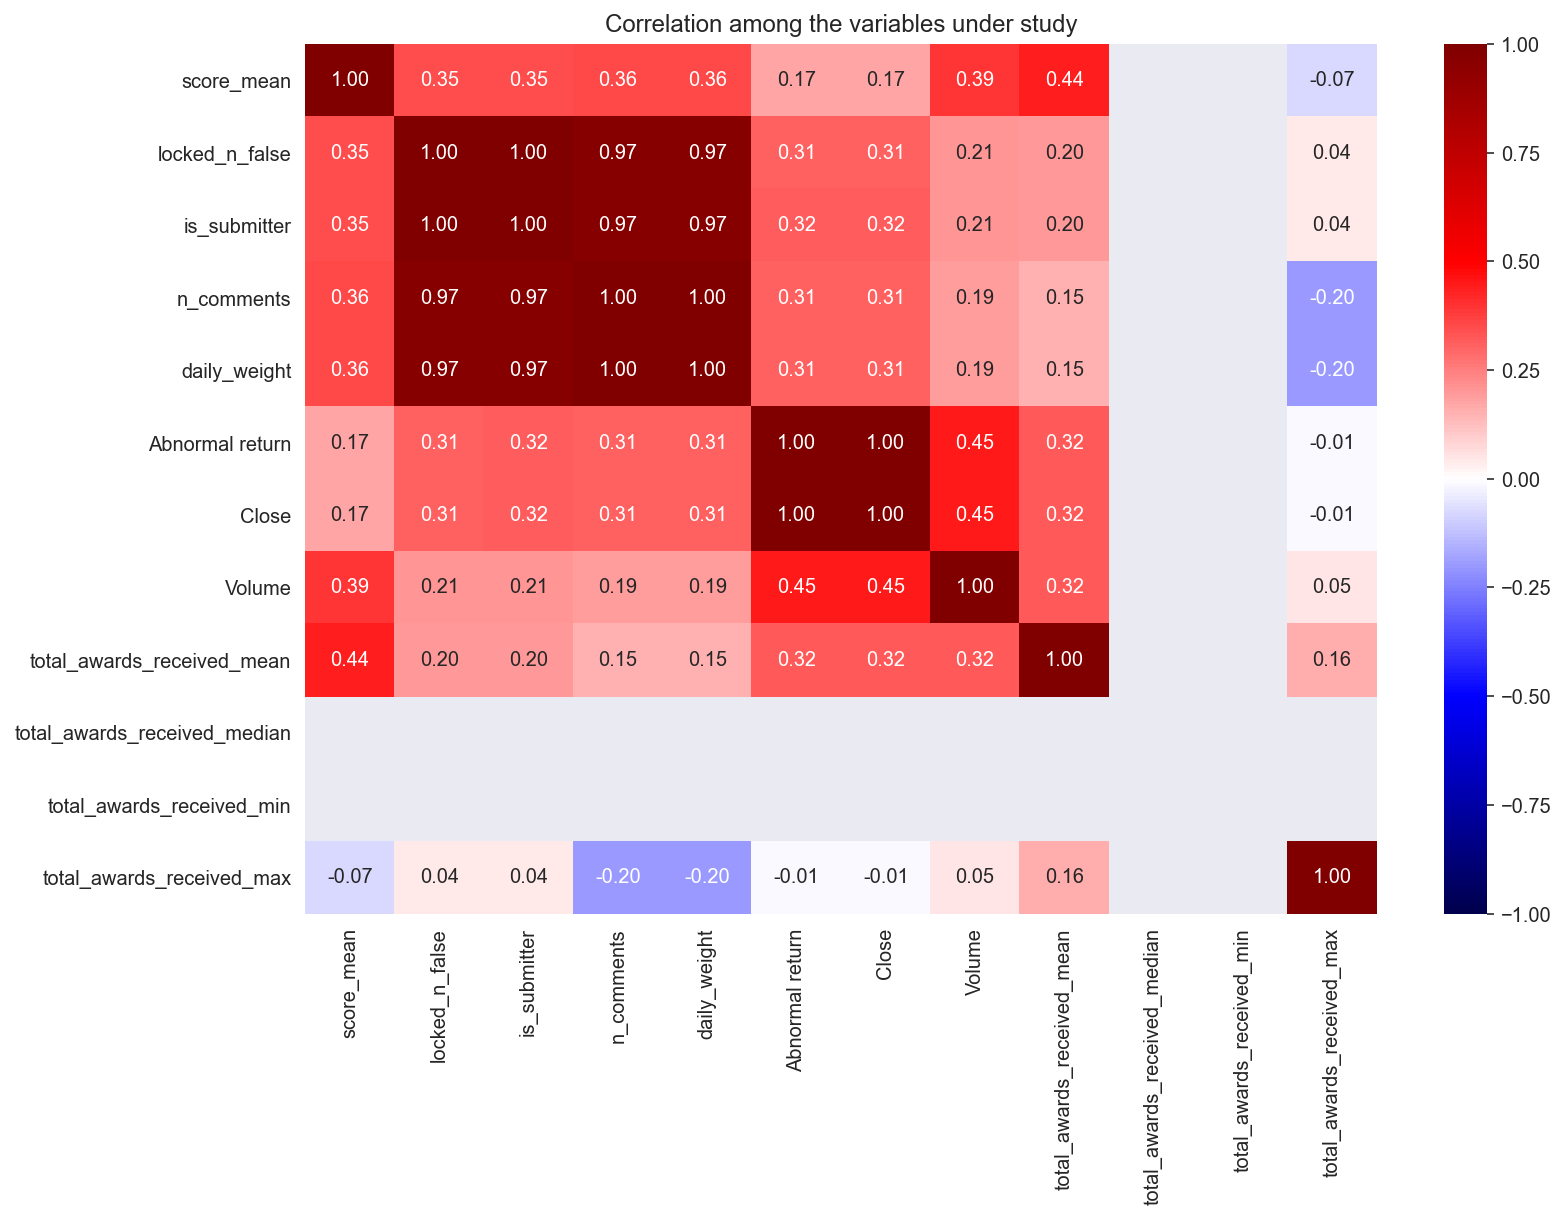

In [204]:
#Showing the result of the correlation on a Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(stock_corr, cmap='seismic',fmt='.2f',vmin=-1,vmax=1,annot=True)
plt.title("Correlation among the variables under study")
plt.show();

## DETECTING MULTICOLINEARITY IN OUR DATASET

In [298]:
def calc_vif (V):
    #Calculating VIF
    vif= pd.DataFrame()
    vif["variables"]= V.columns
    vif["VIF"]= [variance_inflation_factor(V.values,i) for i in range (V.shape[1])]
    
    return (vif)

In [300]:
V= stock.iloc[:,:-1]
calc_vif(V)

,variables,VIF
0,score_mean,2.487222e+00
1,locked_n_false,1.272450e+04
2,is_submitter,1.277277e+04
3,n_comments,1.801440e+15
4,daily_weight,1.801440e+15
5,Abnormal return,5.782787e+05
6,Close,5.805521e+05
7,Volume,2.368672e+00
8,total_awards_received_mean,3.062990e+00
9,total_awards_received_median,NaN


In [143]:
#Make a copy of the data so as to use it for forecasting purpose.
# By doing this, the original Data Frame remains intact.
stock1= stock.copy()

In [144]:
#We obtain a list of variables to be used as the independent variables 
# We do this by dropping unnecessary columns
X= stock1.drop(['Abnormal return','total_awards_received_median','total_awards_received_min','total_awards_received_max'], axis=1)

In [145]:
#We obtain the variable to be used as the dependent variable
y= stock['Abnormal return']

In [262]:
X_train,X_test, y_train,y_test = train_test_split (X,y, test_size= 0.2,random_state=123)

In [263]:
model= LinearRegression()

In [264]:
model.fit(X_train, y_train);

In [265]:
y_pred= model.predict(X_test)

In [266]:
y_pred

array([13.5171968 , 11.5509053 , 15.3463221 , 13.64462939, 11.43009623,
       10.80239588, 11.67879547, 13.26986175,  9.55938219, 19.74919021,
       40.50045012,  9.15501704, 14.64328174, 89.78270965, 13.65409623,
       13.11033118, 16.35060466, 15.60227632, 49.29934017, 45.755102  ,
       11.35964778, 92.15519915])

In [260]:
#Print out the intercept of the model.
model.intercept_

-0.18164864043774287

In [261]:
#Print out the coefficients of the forecasting model.
model.coef_.tolist()

[-0.001720724723549489,
 2.4409605264647633e-05,
 -2.631789900722942e-05,
 1.2350245076449314e-06,
 -1.3775607848041508e-08,
 0.9999966101517087,
 -2.867538919294375e-10,
 -2.0147043938395157]

In [227]:
#The coefficients are better presented as a Data Frame.
#With tis,we can see the variables they are paired with.
coeff_df= pd.DataFrame(model.coef_, X.columns,columns=['Coefficient'])

In [276]:
coeff_df

,Coefficient
score_mean,3.638255e-04
locked_n_false,1.398039e-05
is_submitter,-1.562860e-05
n_comments,8.531919e-07
daily_weight,-7.503502e-09
Close,1.000053e+00
Volume,-2.242816e-10
total_awards_received_mean,-2.859934e+00


## Check for autocorrelation  in the dataset used for the forecasting model. To do this, we use the statsmodel library to run the linear model

In [279]:
X_train_stm= stm.add_constant(X_train)
ls= stm.OLS(y_train,X_train_stm).fit()

In [280]:
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:        Abnormal return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.290e+07
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          6.70e-231
Time:                        10:31:56   Log-Likelihood:                 121.92
No. Observations:                  85   AIC:                            -227.8
Df Residuals:                      77   BIC:                            -208.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# TESTING FOR THE PRESENCE OF HETEROSCEDASTICITY

In [303]:
names= ['Langrange Multiplier Statistic', 'p-value','f-value', 'f p-value']

In [308]:
test= st.het_breuschpagan(ls.resid,ls.model.exog)

In [309]:
lzip(names,test)

[('Langrange Multiplier Statistic', 11.911193759134946),
 ('p-value', 0.1552104000968047),
 ('f-value', 1.7926566062482405),
 ('f p-value', 0.10074694615055452)]

In [ ]:
#Interpretation of the Breusch-Pagan test for heteroscedasticity
One of the assumption of a linear model is that the residual must be homoscedastic, i.e., 
have a constant variance.
The null hypothesis is that the variance is constant (homoscedastic) 
against the alternative hypothesis which states that it is heteroscedastic.
The p-value (0.155) > 0.55 shows that we should accept the null hypothesis that the variance of the 
residual is homoscedastic.
Therefore, there is absence of heteroscedasticity in the data.


# MODEL PERFORMANCE EVALUATION

In [178]:
MSE= mean_squared_error(y_test, y_pred)

In [267]:
MSE

0.004880629933320643

In [268]:
#Calculate the root mean squared error (RMSE)
RMSE = sqrt(MSE)

In [269]:
RMSE

0.06986150537542576

In [162]:
# Calculate the r2 score
R2_SCORE = r2_score(y_test, y_pred)*100

In [163]:
R2_SCORE

99.99986716769065

In [290]:
#Calculate the mean absolute percentage error (MAPE)
def mape( y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [291]:
MAPE= mape(y_test,y_pred)

In [292]:
MAPE

0.4849792105489741

# TESTING THE HYPOTHESIS ONE AFTER THE OTHER

## H1A: SCORE HAS POSITIVE RELATIONSHIP WITH THE STOCK PRICE

In [182]:
result1= sm.ols(formula='Close~ score_mean',data=stock).fit()

In [183]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sun, 25 Jul 2021   Prob (F-statistic):             0.0754
Time:                        23:07:21   Log-Likelihood:                -583.35
No. Observations:                 107   AIC:                             1171.
Df Residuals:                     105   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2718      6.986      4.763      0.0

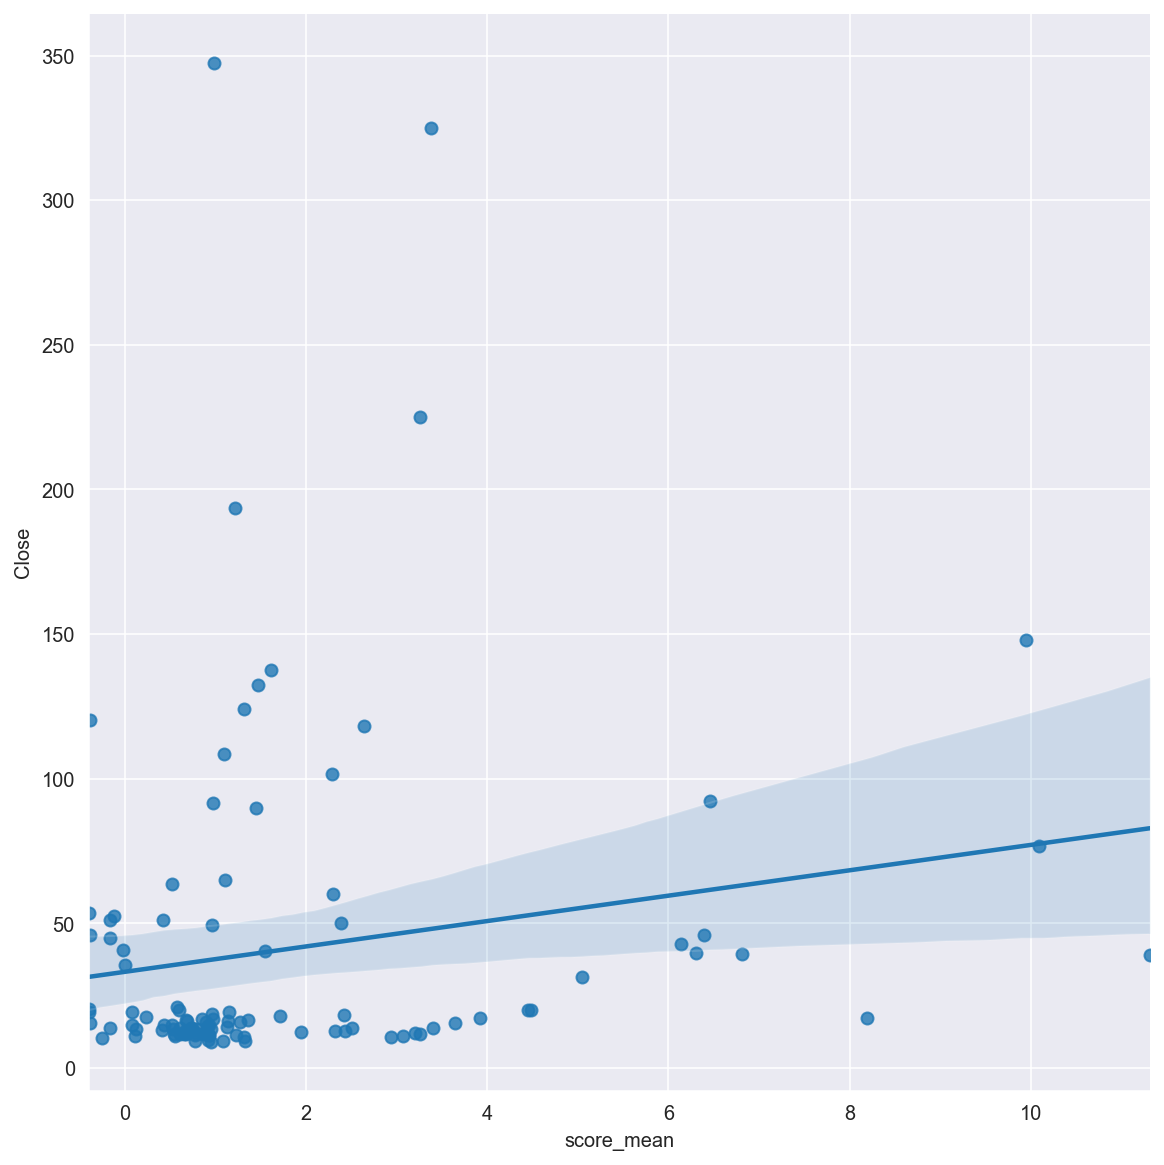

In [198]:
# Plot the relationship on a chart
sns.lmplot(data=stock, x='score_mean',y='Close',size=8)
plt.show()

## INTERPRETATION OF H1A

## H1B: SCORE HAS A POSITIVE RELATIONSHIP WITH VOLUME

In [187]:
result2= sm.ols(formula='np.log(Volume)~ score_mean',data=stock).fit()

In [188]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Volume)   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     12.35
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           0.000653
Time:                        23:08:12   Log-Likelihood:                -150.74
No. Observations:                 107   AIC:                             305.5
Df Residuals:                     105   BIC:                             310.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2450      0.123    132.552      0.0

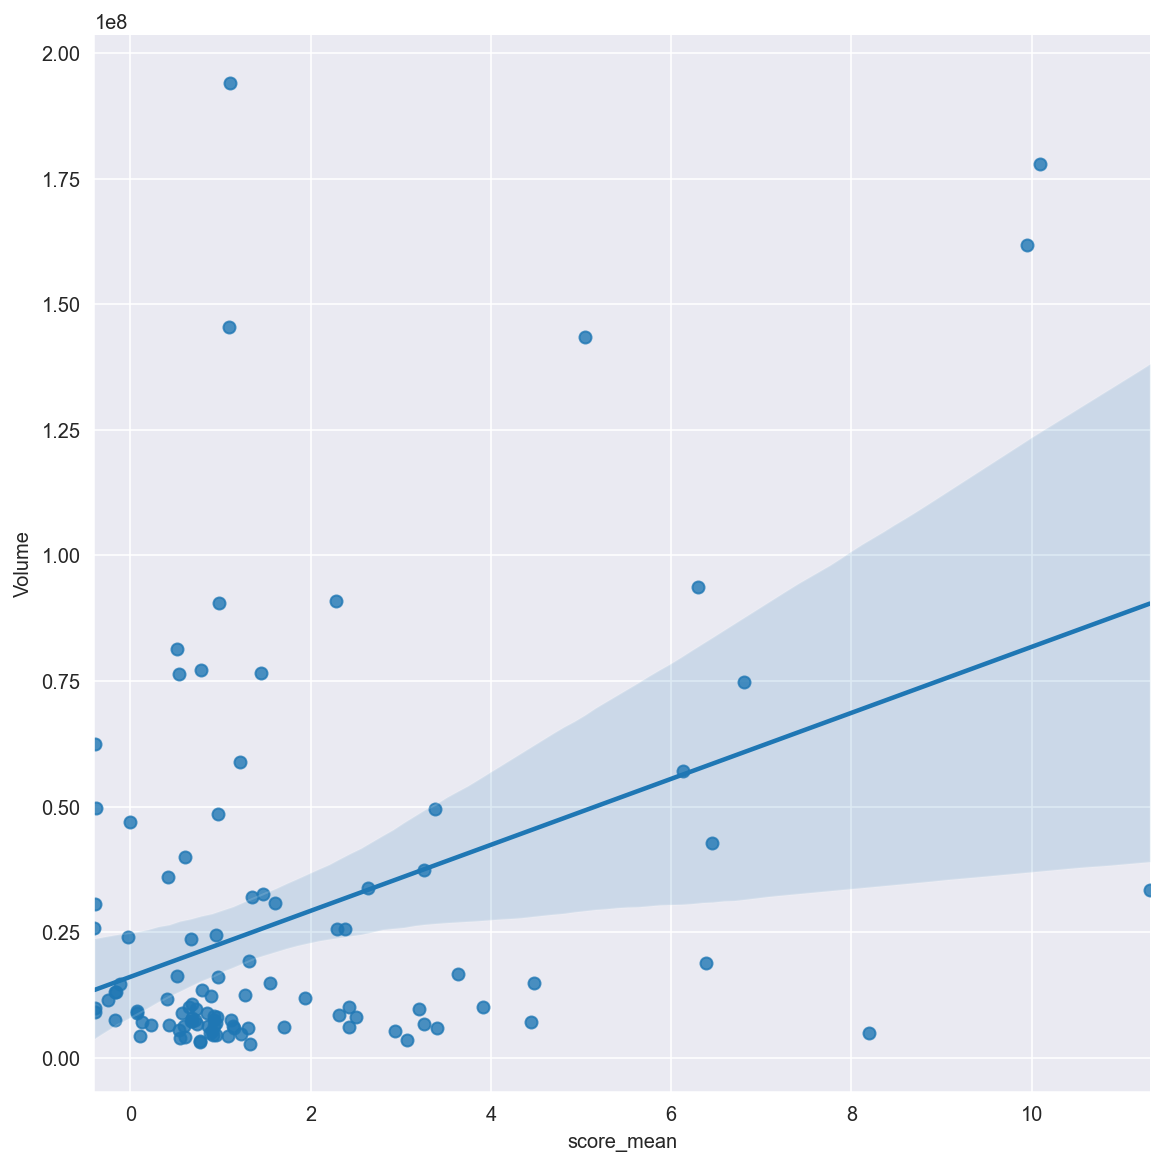

In [189]:
# Plot the relationship on a chart
sns.lmplot(data=stock, x='score_mean',y='Volume',size=8)
plt.show()

## INTERPRETATION OF H1B

## H2A: LOCKED MESSAGE HAS POSITIVE RELATIONSHIP WITH THE STOCK PRICE

In [190]:
result3= sm.ols(formula='Close~ np.log(locked_n_false)',data=stock).fit()

In [191]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     10.17
Date:                Sun, 25 Jul 2021   Prob (F-statistic):            0.00188
Time:                        23:08:38   Log-Likelihood:                -580.02
No. Observations:                 107   AIC:                             1164.
Df Residuals:                     105   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -316

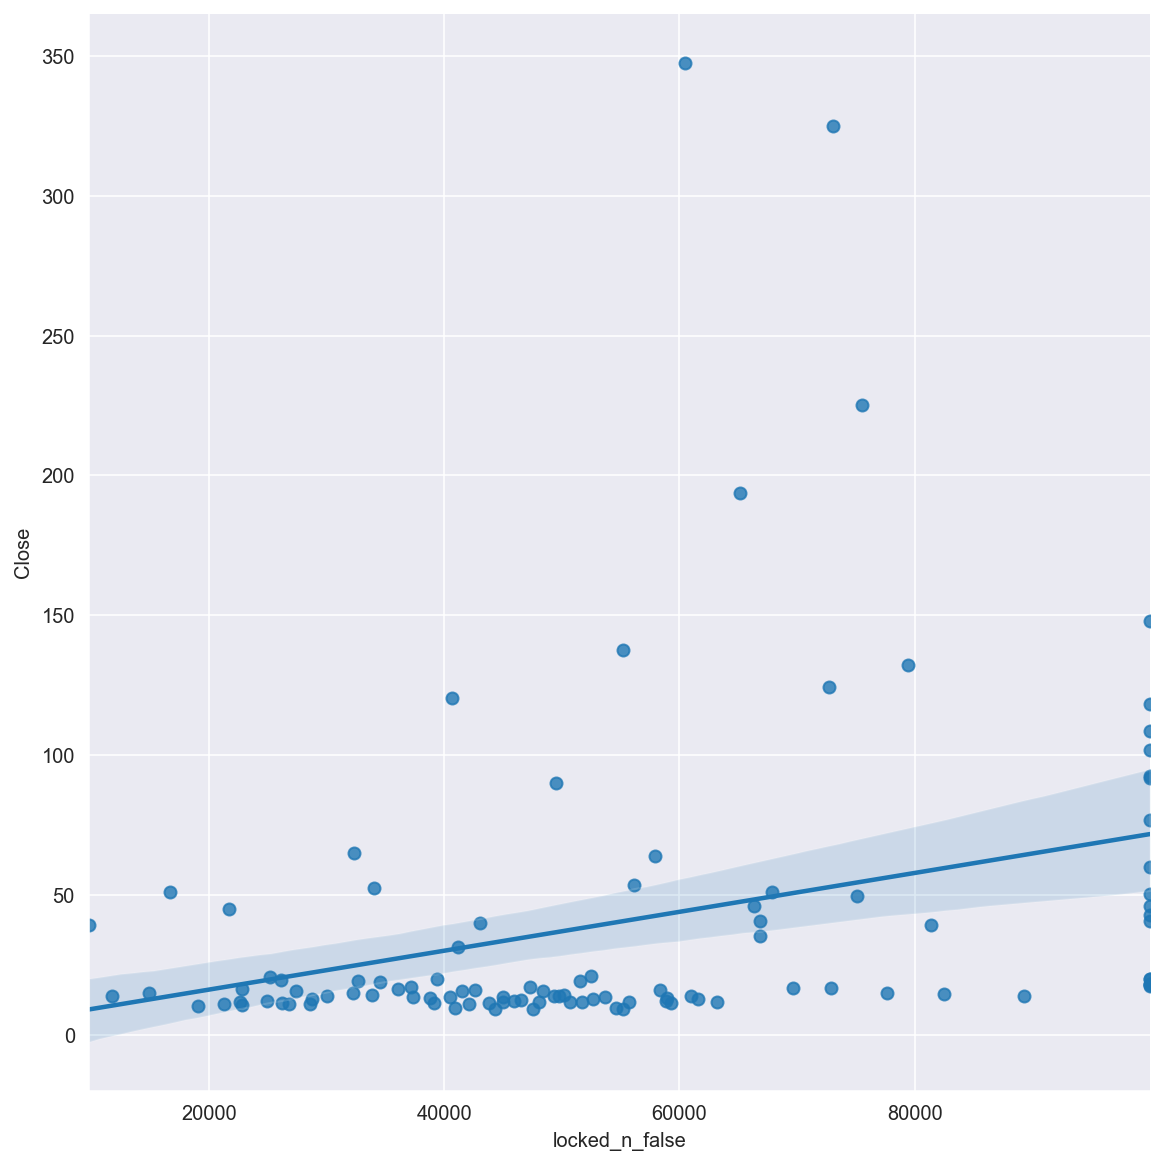

In [192]:
# Plot the relationship on a chart
sns.lmplot(data=stock, x='locked_n_false',y='Close',size=8)
plt.show()

## INTERPRETATION OF H2A

## H2B: LOCKED MESSAGE HAS POSITIVE RELATIONSHIP WITH THE VOLUME

In [194]:
result4= sm.ols(formula='np.log(Volume)~ np.log(locked_n_false)',data=stock).fit()

In [195]:
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Volume)   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.897
Date:                Sun, 25 Jul 2021   Prob (F-statistic):             0.0510
Time:                        23:09:27   Log-Likelihood:                -154.74
No. Observations:                 107   AIC:                             313.5
Df Residuals:                     105   BIC:                             318.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12

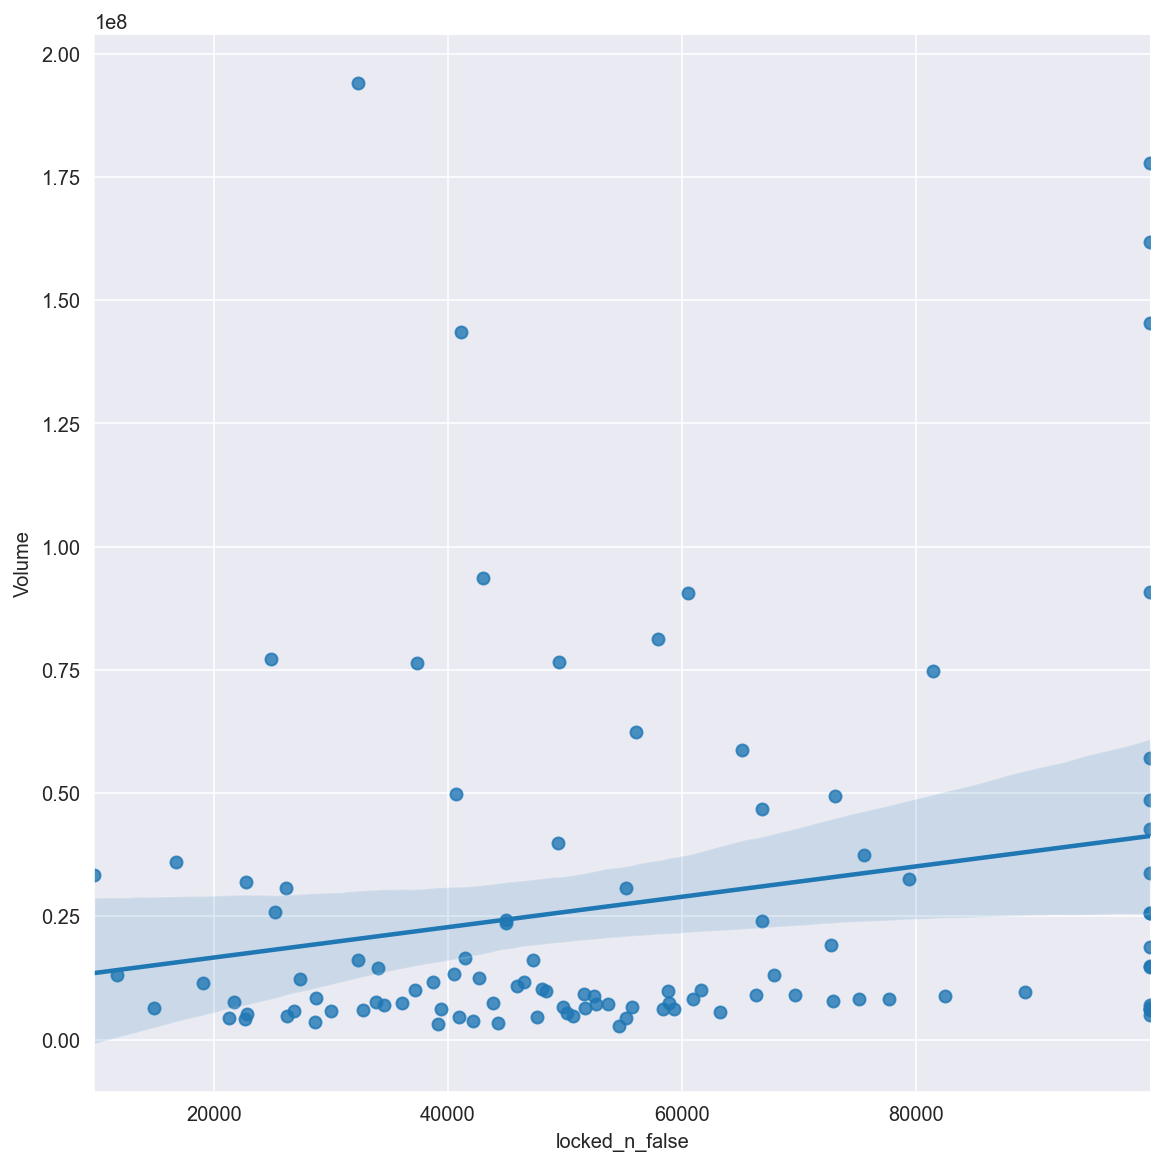

In [193]:
# Plot the relationship on a chart
sns.lmplot(data=stock, x='locked_n_false',y='Volume',size=8)
plt.show()

## INTERPRETATION OF H2B